# EDA Student Performance Indicator

1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.


3) Dataset Information

1. gender : sex of students -> (Male/female)
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Read the dataset(
df = pd.read_csv('stud (1).csv')
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [14]:
df.shape

(1000, 8)

In [15]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [16]:
#duplicates

df.duplicated().sum()

0

In [17]:
#Check datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
## Uniqueness


df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [19]:
# check  the statistics of dataset

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [22]:
[feature for feature in df.columns if df[feature].dtype != 'O']

['math_score', 'reading_score', 'writing_score']

In [23]:
#segrregate numerical and categorical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [24]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [25]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [26]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [27]:
df.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [28]:
## Aggregate the total score with mean

df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

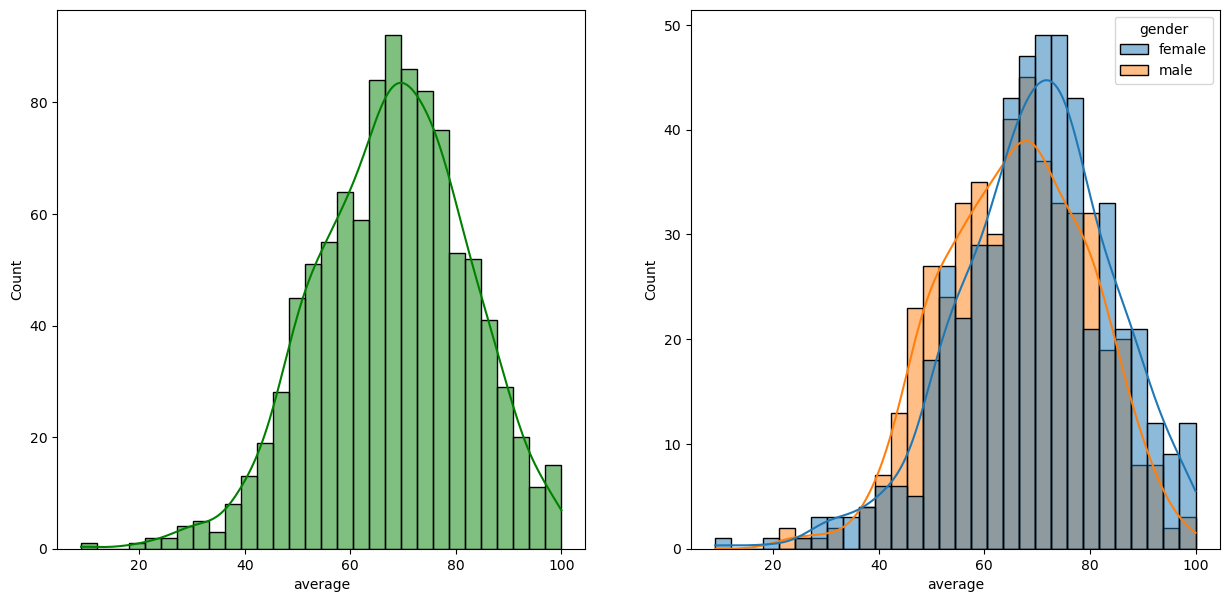

In [29]:
### Explore More Visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

# Insights
- Female student tend to perform well than male students

<Axes: xlabel='average', ylabel='Count'>

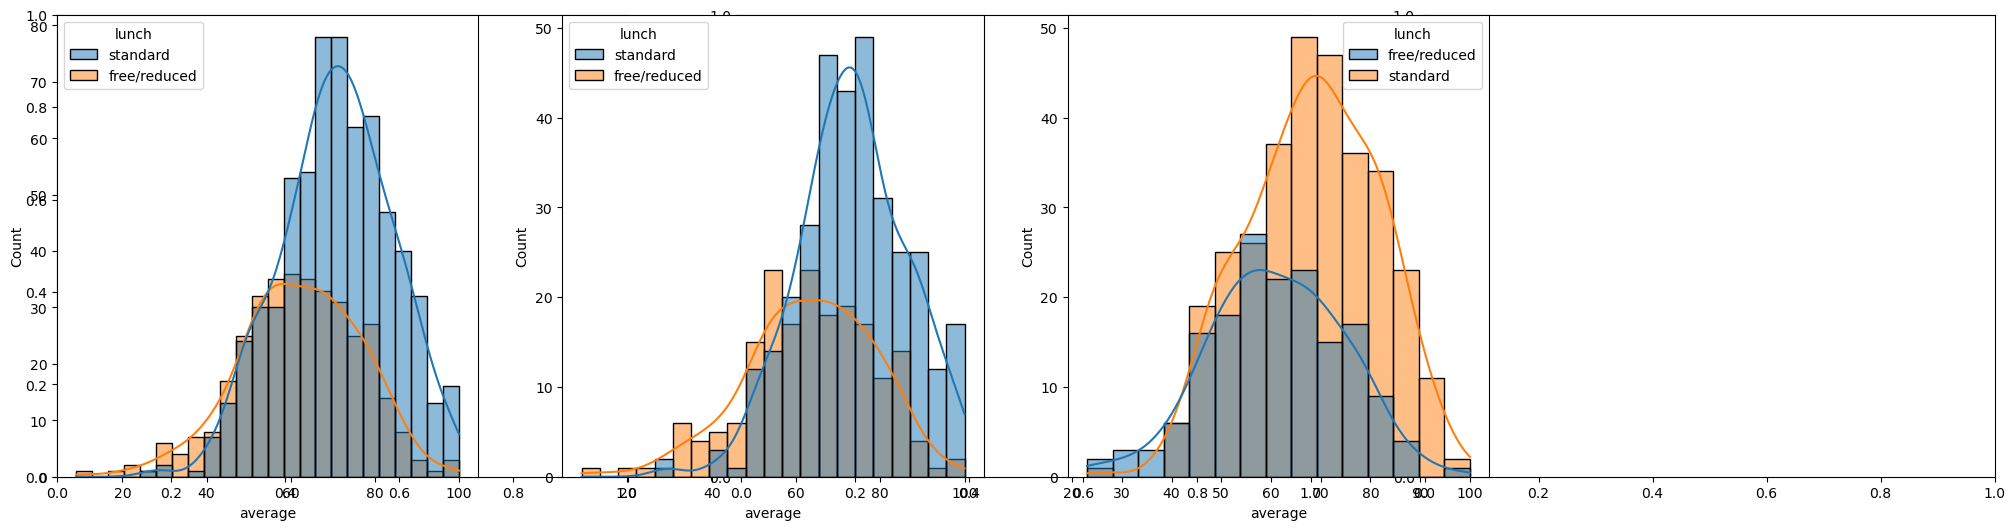

In [30]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue = 'lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender =='female'],x='average',kde = True,hue = 'lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender =='male'],x='average',kde = True,hue = 'lunch')

# Insights
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male of female

<Axes: xlabel='average', ylabel='Count'>

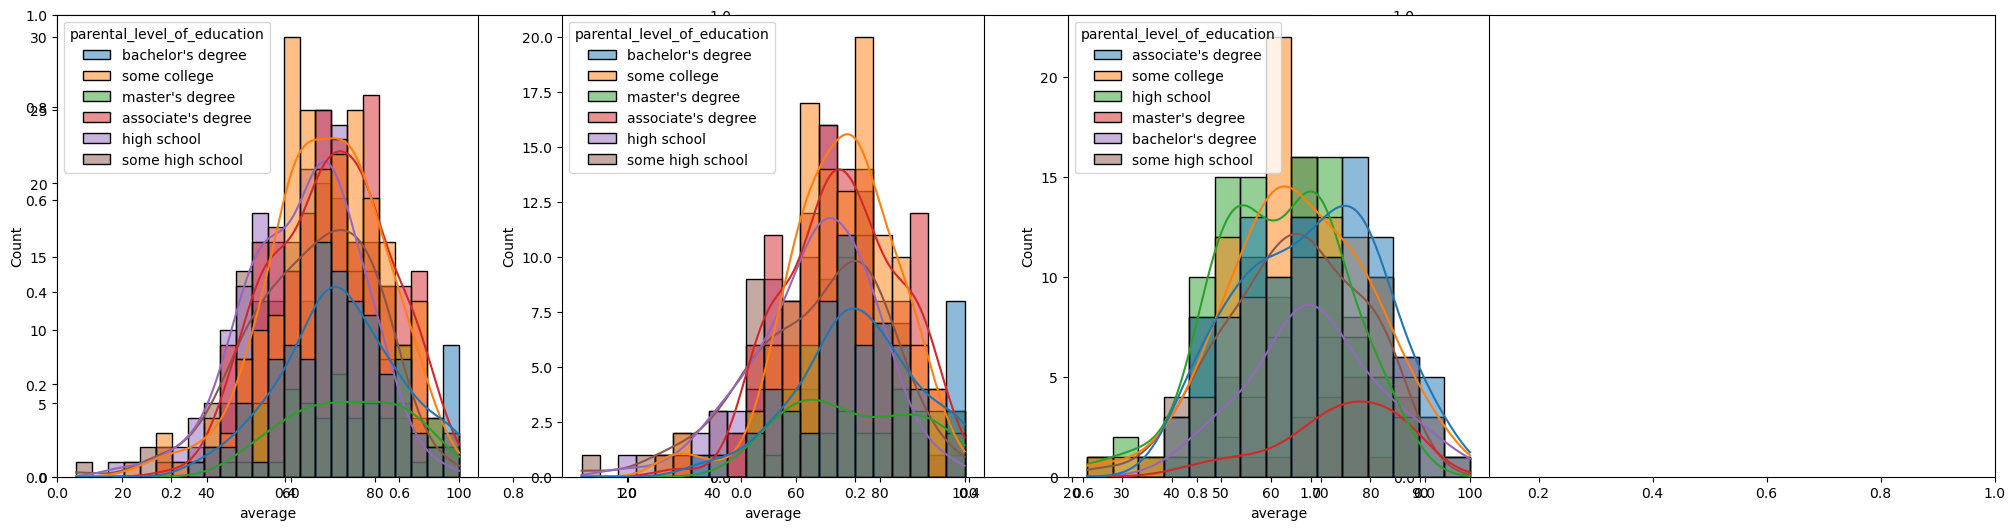

In [31]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue = 'parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender =='female'],x='average',kde = True,hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender =='male'],x='average',kde = True,hue = 'parental_level_of_education')

#####  Insights
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='average', ylabel='Count'>

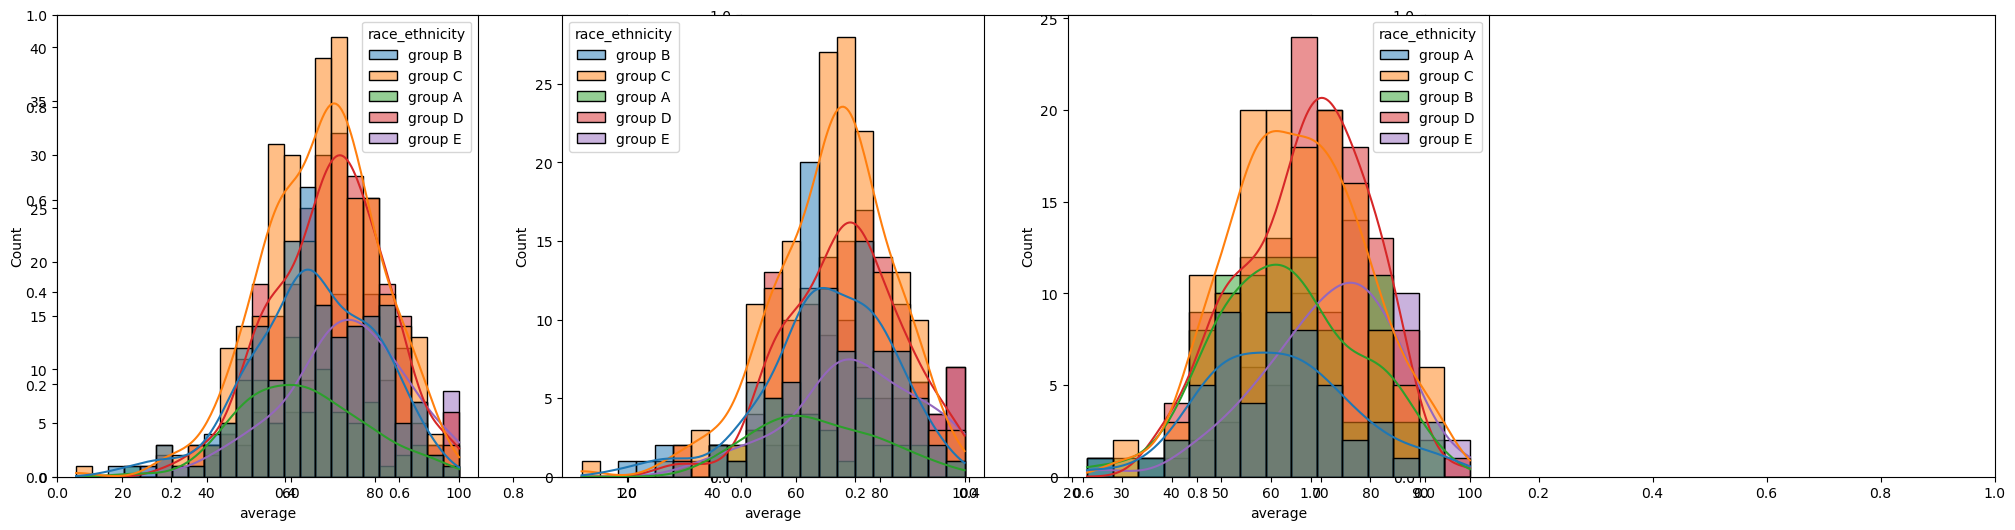

In [32]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender =='female'],x='average',kde = True,hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender =='male'],x='average',kde = True,hue = 'race_ethnicity')

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

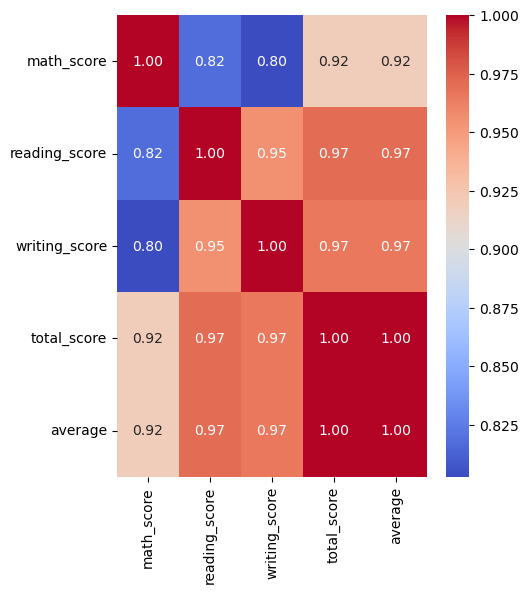

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(5, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

